# Ejercicios de Programación usando GMM

1. (2 puntos). Carga el archivo de datos “ClimaticData_GMM.xls” y representa sus observaciones gráficamente en un scatterplot que tenga por título “Climatic data”, que su eje x tenga la etiqueta “Pressure” y su eje y la etiqueta “Temperature”.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("C:/Users/alici/Desktop/Master/Aprendizaje No supervisado/GMM/GMM/ClimaticData_GMM.xls")

data.shape

(1570, 2)

In [3]:
print(data)

      Pressure  Temperature
0      8.18932     13.27410
1      9.22044     13.48820
2     10.22860      9.53073
3     11.76110      4.00888
4     10.39910      9.54415
...        ...          ...
1565  34.93620     22.03860
1566  38.09750     23.00120
1567  36.95050     18.73850
1568  36.24350     18.67130
1569  38.12970     19.46510

[1570 rows x 2 columns]


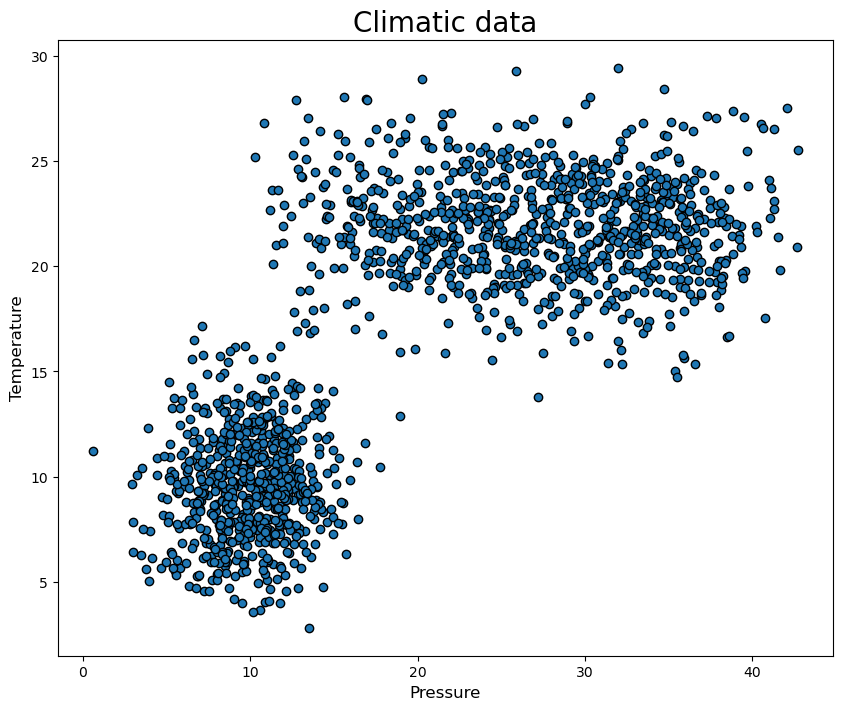

In [4]:
plt.figure(figsize=(10,8))

plt.title("Climatic data", fontsize=20)
plt.xlabel("Pressure",fontsize=12)
plt.ylabel("Temperature",fontsize=12)

plt.scatter(data["Pressure"],data["Temperature"],edgecolors='black')

2. (2 puntos). Usa k-medias para clasificar las observaciones en 2 clústers diferentes y representa el mismo scatterplot que en el ejercicio anterior, esta vez con las observaciones clasificadas en cada clúister.
Comenta la agrupación realizada por k-medias. ¿Te parece una agrupación correcta de los datos?


In [5]:
columnas=data.columns
x=data.loc[:,columnas].values

x.shape

(1570, 2)

In [6]:
from sklearn.cluster import KMeans

kmeans2=KMeans(2,random_state=0)
labels_k2=kmeans2.fit(x).predict(x)

c:\Users\alici\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


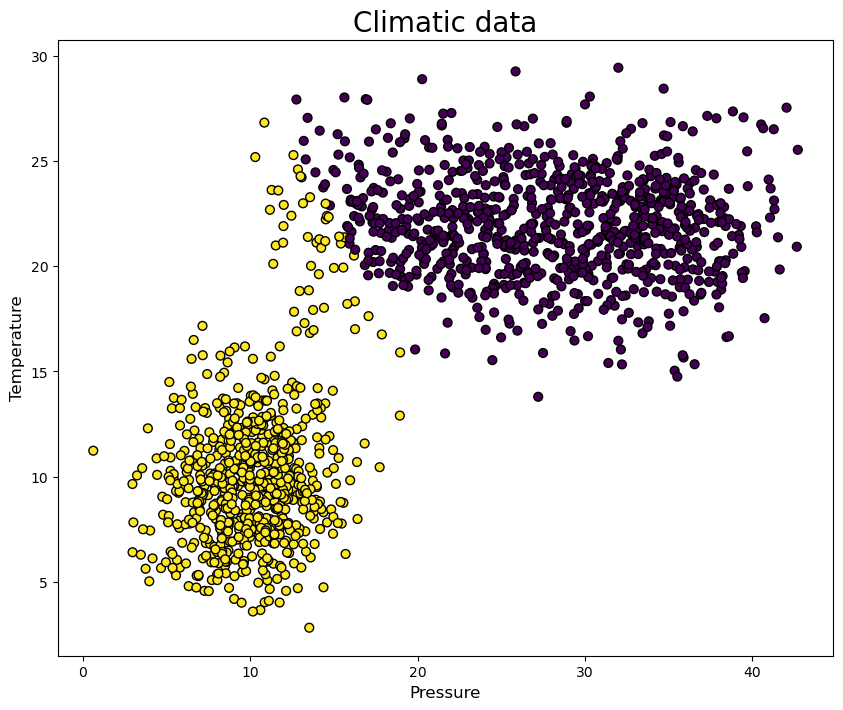

In [7]:
plt.figure(figsize=(10,8))

plt.title("Climatic data", fontsize=20)
plt.xlabel("Pressure",fontsize=12)
plt.ylabel("Temperature",fontsize=12)

plt.scatter(x[:,0], x[:,1], c=labels_k2, s=40, cmap="viridis", edgecolors='black')

3. (2 puntos). Usa ahora GMM para realizar una agrupación correcta de los datos. Representa el scatterplot resultante, haciendo, además, que cada observación tenga un tamaño proporcional a su probabilidad de pertenencia a un grupo. 

In [8]:
#tambien con 2 clusters?

from sklearn.mixture import GaussianMixture

gmm=GaussianMixture (n_components=2).fit(x)
labels_gmm2=gmm.predict(x)


c:\Users\alici\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [9]:
#plot con tamaño en funcion de la probabilidad

probs_gmm2=gmm.predict_proba(x)
print(probs_gmm2[:5].round(3))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [10]:
probs_gmm2.shape

(1570, 2)

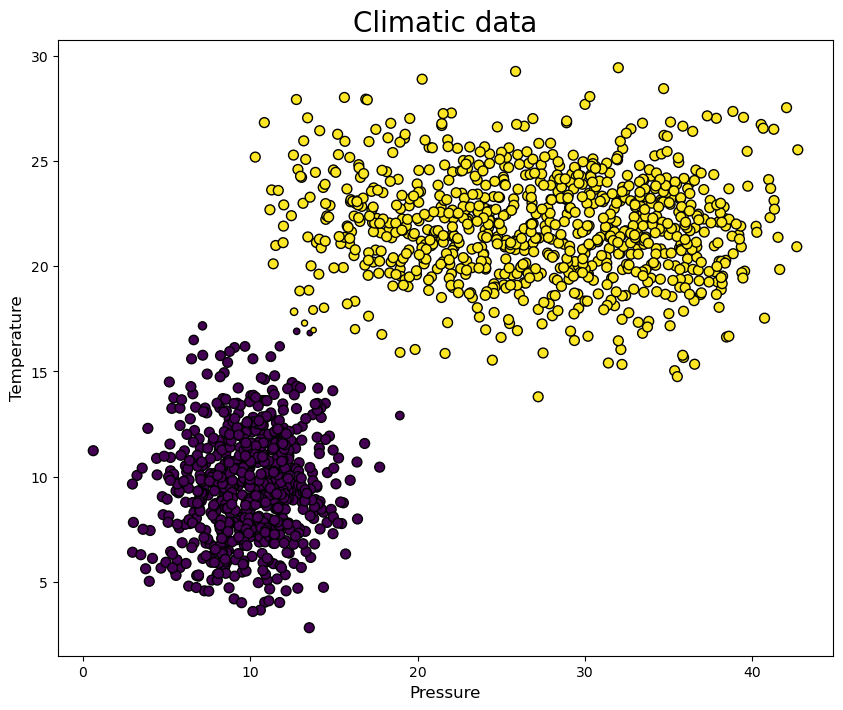

In [11]:
plt.figure(figsize=(10,8))

plt.title("Climatic data", fontsize=20)
plt.xlabel("Pressure",fontsize=12)
plt.ylabel("Temperature",fontsize=12)

size=50*probs_gmm2.max(1)**2  #al cuadrado enfatiza las diferencias
plt.scatter(x[:,0],x[:,1], c=labels_gmm2, cmap='viridis', s=size, edgecolors='black')

4. (2 puntos). Hemos visto la clasificación hecha por GMM. Representa las funciones Guassianas del modelo ajustadas a cada clúster de observaciones.

In [12]:
#Para representar las funciones Gaussianas ajustadas por el modelo GMM a cada clúster, 
# podemos visualizar las elipses que representan las covarianzas de las distribuciones ajustadas.

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax=ax or plt.gca()
    
    if covariance.shape==(2,2):
        U,s,Vt=np.linalg.svd(covariance)
        angle=np.degrees(np.arctan2(U[1,0], U[0,0]))
        width, height=2*np.sqrt(s)
    
    else:
        angle=0
        width,height=2*np.sqrt(covariance)
    
    for nsig in range(1,4):
        ax.add_patch(Ellipse(position,nsig*width,nsig*height,
                             angle,**kwargs))

def plot_gmm(gmm,X,label=True,ax=None):
    ax=ax or plt.gca()
    labels=gmm.fit(X).predict(X)
    
    if label:
        ax.scatter(x[:,0],x[:,1],c=labels,s=40,cmap='viridis', edgecolors='black', zorder=2)
    else:
        ax.scatter(x[:,0],x[:,1],s=40,zorder=2)
    
    ax.axis('equal')
    w_factor=0.2/gmm.weights_.max()
    for pos,covar, w in zip(gmm.means_,gmm.covariances_,gmm.weights_):
        draw_ellipse(pos,covar,alpha=w * w_factor)

c:\Users\alici\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\alici\AppData\Local\Temp\ipykernel_23056\3555363332.py:22: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position,nsig*width,nsig*height,


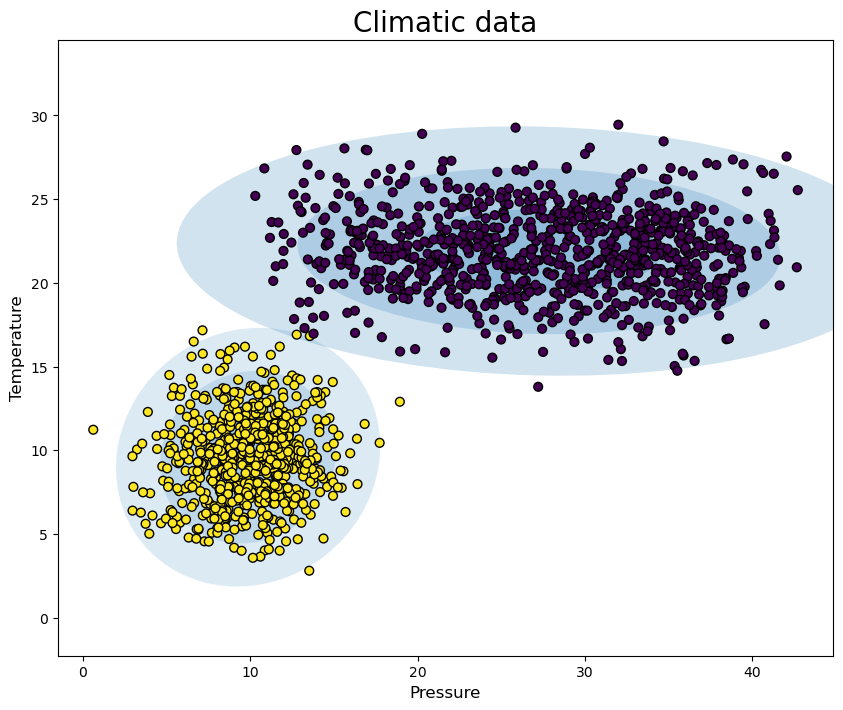

In [13]:
plt.figure(figsize=(10,8))

plt.title("Climatic data", fontsize=20)
plt.xlabel("Pressure",fontsize=12)
plt.ylabel("Temperature",fontsize=12)

plot_gmm(gmm,x)

5. (2 puntos). Ahora utilizarás 3 modelos GMM cada uno con un tipo de covarianza: “diag”, “spherical” y “full”. Utiliza cada uno de estos 3 modelos para aprender a partir de los datos su distribución. Seguidamente, usa cada uno de los modelos aprendidos para generar 1000 puntos de datos totalmente nuevos que sigan la distribución aprendida. Representa estos nuevos datos en 3 scatterplots diferentes (uno para cada tipo de covarianza de GMM) que tengan por título “New Climatic data”, que su eje x tengan la etiqueta “Pressure” y su eje y la etiqueta “Temperature”. A partir de las diferentes gráficas podrás deducir que hay un tipo de covarianza que crea un mal ajuste a los datos. ¿De cuál se trata?

In [14]:
gmm_d=GaussianMixture(n_components=2,covariance_type="diag",random_state=0)
gmm_d.fit(x)

gmm_s=GaussianMixture(n_components=2,covariance_type="spherical",random_state=0)
gmm_s.fit(x)

gmm_f=GaussianMixture(n_components=2,covariance_type="full",random_state=0)
gmm_f.fit(x)

c:\Users\alici\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\alici\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\alici\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


GaussianMixture(n_components=2, random_state=0)

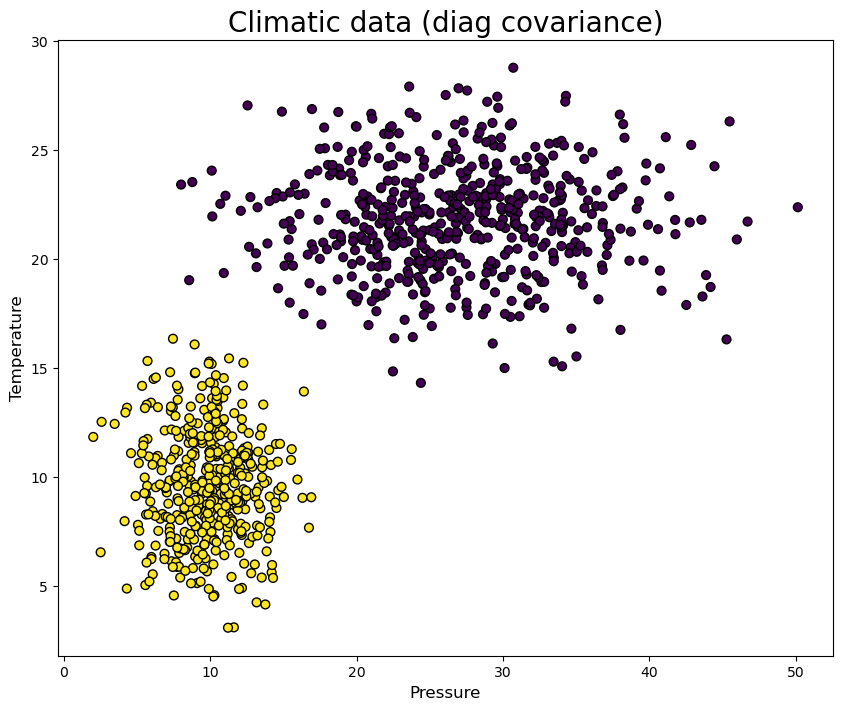

In [15]:
# Para gmm_d

x_d_new,y_d_new=gmm_d.sample(1000)

plt.figure(figsize=(10,8))

plt.title("Climatic data (diag covariance)", fontsize=20)
plt.xlabel("Pressure",fontsize=12)
plt.ylabel("Temperature",fontsize=12)

plt.scatter(x_d_new[:,0],x_d_new[:,1],c=y_d_new,s=40,cmap='viridis',edgecolors='black')

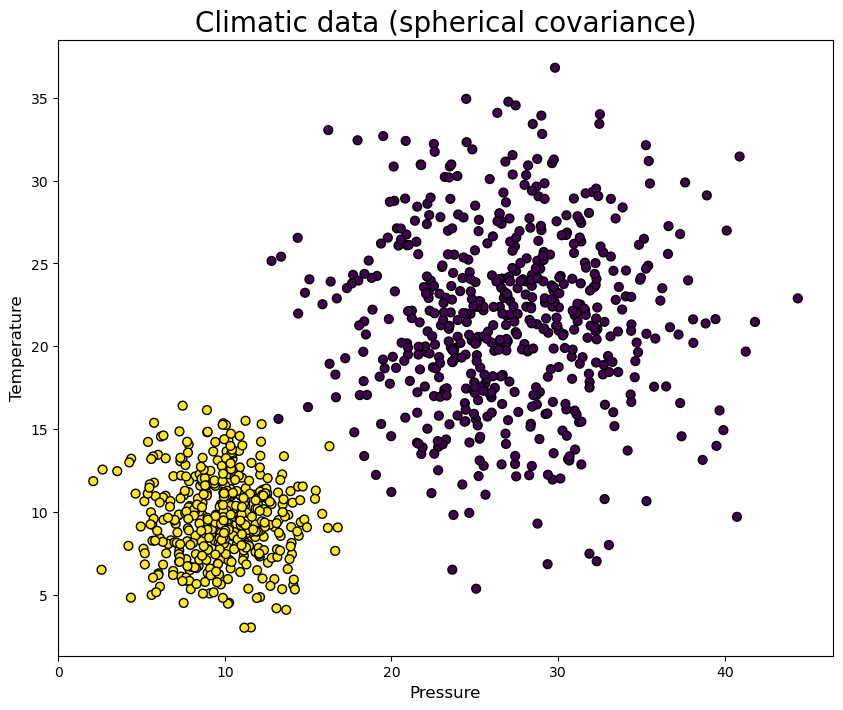

In [16]:
#para covarianza esferica

x_s_new,y_s_new=gmm_s.sample(1000)

plt.figure(figsize=(10,8))

plt.title("Climatic data (spherical covariance)", fontsize=20)
plt.xlabel("Pressure",fontsize=12)
plt.ylabel("Temperature",fontsize=12)

plt.scatter(x_s_new[:,0],x_s_new[:,1],c=y_s_new,s=40,cmap='viridis',edgecolors='black')

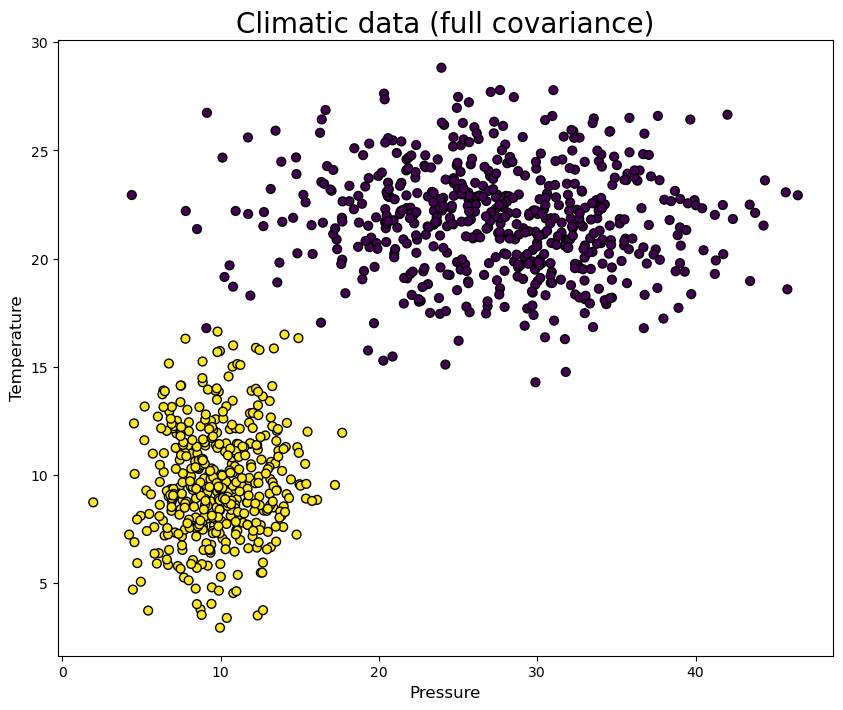

In [17]:
# para full covarianza

x_f_new,y_f_new=gmm_f.sample(1000)

plt.figure(figsize=(10,8))

plt.title("Climatic data (full covariance)", fontsize=20)
plt.xlabel("Pressure",fontsize=12)
plt.ylabel("Temperature",fontsize=12)

plt.scatter(x_f_new[:,0],x_f_new[:,1],c=y_f_new,s=40,cmap='viridis',edgecolors='black')

## La esferica parece ser que es la que peor ajusta

c:\Users\alici\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\alici\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\alici\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


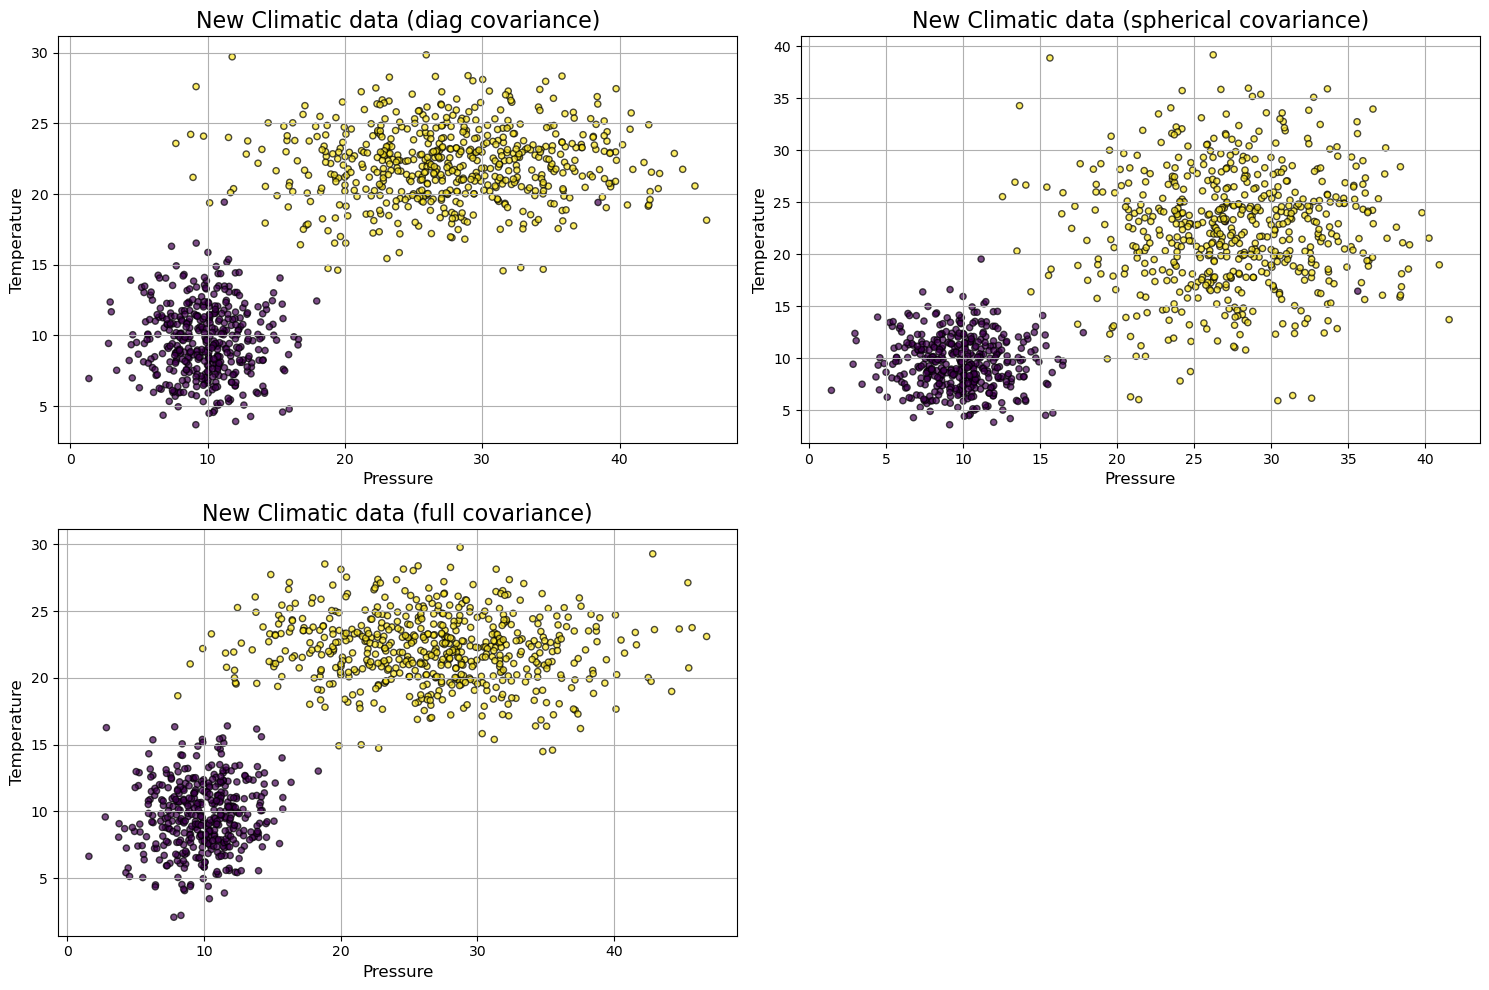

In [ ]:
# Tipos de covarianza: 'diag', 'spherical', 'full'
covariance_types = ['diag', 'spherical', 'full']


generated_data = {}

for cov_type in covariance_types:

    gmm_model = GaussianMixture(n_components=2, covariance_type=cov_type, random_state=42)
   
    gmm_model.fit(x)

    new_data, new_labels= gmm_model.sample(1000)
    generated_data[cov_type] = new_data

plt.figure(figsize=(15, 10))

for i, cov_type in enumerate(covariance_types, 1):
    plt.subplot(2, 2, i)
    plt.title(f"New Climatic data ({cov_type} covariance)", fontsize=16)
    plt.xlabel("Pressure", fontsize=12)
    plt.ylabel("Temperature", fontsize=12)
    

    new_data = generated_data[cov_type]
    
    plt.scatter(new_data[:, 0], new_data[:, 1],c=new_labels, s=20, cmap='viridis', alpha=0.7, edgecolors='black')
    plt.grid()

plt.tight_layout()
plt.show()
